In [1]:
library(tidyverse)
library(dplyr)
library(ggplot2)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.0.0     ✔ purrr   0.2.5
✔ tibble  2.0.1     ✔ dplyr   0.7.6
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
Warning message:
“package ‘tibble’ was built under R version 3.5.2”── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [30]:
data = read_csv("clean_data.csv") %>% select(-X1)

Warning message:
“Missing column names filled in: 'X1' [1]”Parsed with column specification:
cols(
  X1 = col_integer(),
  lab_hours = col_integer(),
  attend_OH = col_integer(),
  group = col_character(),
  academic = col_character(),
  yrs_out_school = col_double(),
  program = col_integer(),
  stat = col_integer(),
  optional = col_integer()
)


In [31]:
head(data)

lab_hours,attend_OH,group,academic,yrs_out_school,program,stat,optional
20,0,Mostly alone,Engineering,0,3,2,3
20,2,Mostly alone,Science,0,3,3,4
15,0,Mostly alone,Business,2,4,2,1
19,4,Mostly in groups,Math,6,3,3,1
20,0,Mostly alone,Engineering,0,4,3,1
30,5,Mostly in groups,Math,6,2,2,3


Warning message:
“Removed 1 rows containing missing values (geom_point).”

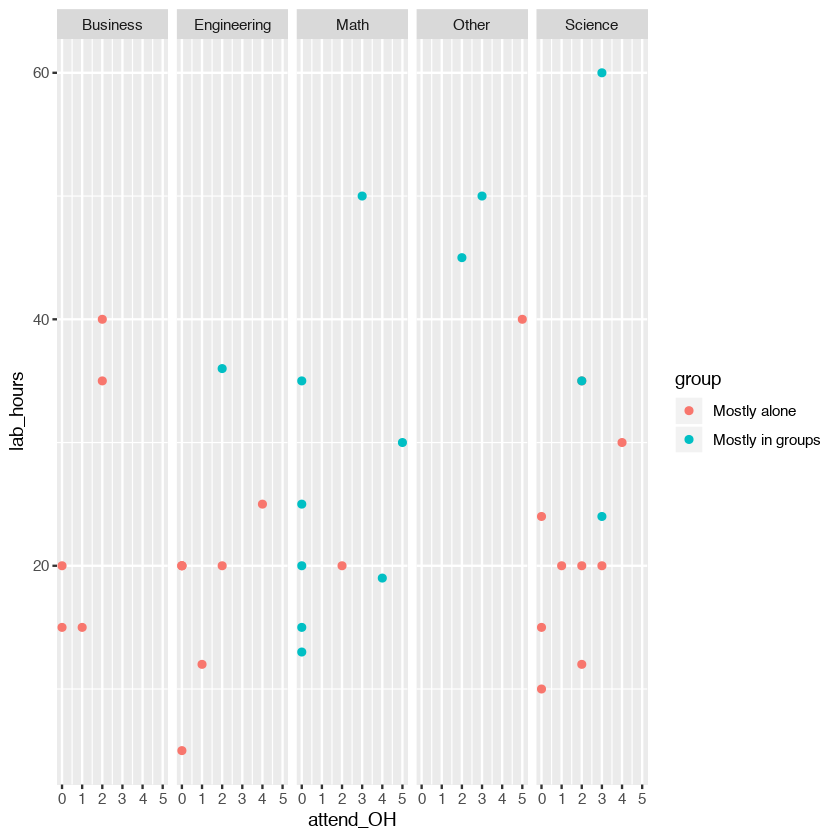

In [15]:
data %>% 
    ggplot(aes(attend_OH, lab_hours)) +
    geom_point(aes(color = group)) +
    facet_grid(~ academic)

Warning message:
“Removed 1 rows containing missing values (geom_point).”

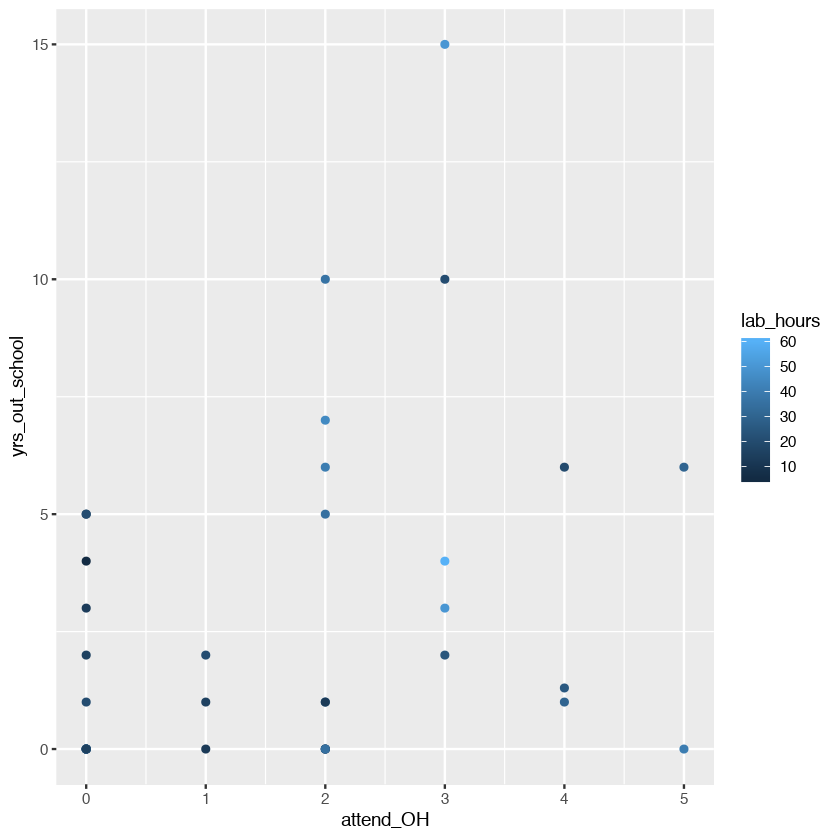

In [20]:
data %>% 
    ggplot(aes(attend_OH, yrs_out_school)) +
    geom_point(aes(color = lab_hours))

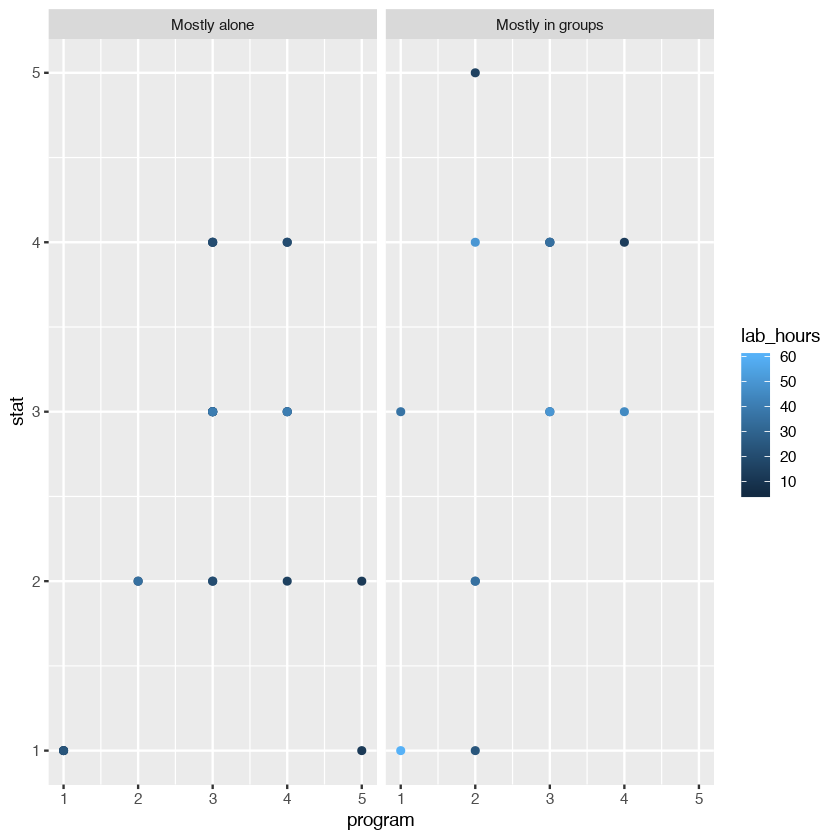

In [26]:
data %>% 
    ggplot(aes(program, stat)) +
    geom_point(aes(color = lab_hours)) +
    facet_grid(~ group)

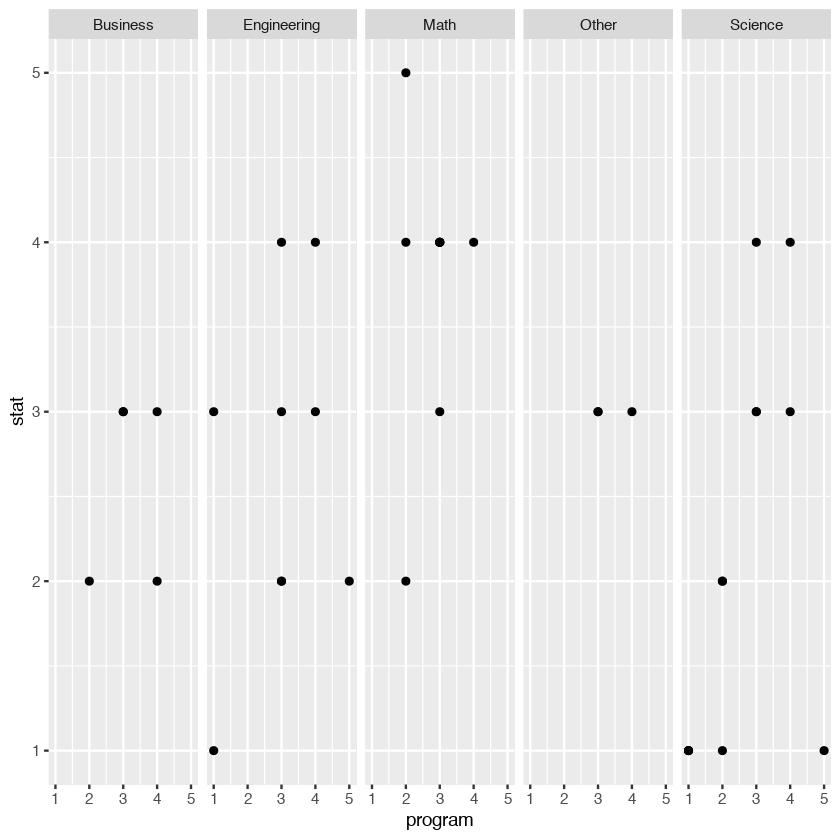

In [36]:
data %>% 
    ggplot(aes(program, stat)) +
    geom_point() +
    facet_grid(~ academic)

In [34]:
mod1 <- glm(lab_hours ~ . ,data = data)
summary(mod1)


Call:
glm(formula = lab_hours ~ ., data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-13.804   -3.954   -1.338    4.822   20.031  

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)  
(Intercept)            24.0149     9.2476   2.597   0.0153 *
attend_OH               3.1343     1.2235   2.562   0.0166 *
groupMostly in groups  14.0079     5.3217   2.632   0.0141 *
academicEngineering    -7.3267     5.4728  -1.339   0.1922  
academicMath          -18.2686     7.8872  -2.316   0.0287 *
academicOther           4.2879     8.2849   0.518   0.6091  
academicScience        -6.0079     5.2903  -1.136   0.2665  
yrs_out_school         -0.3603     0.5950  -0.605   0.5501  
program                -2.5614     1.7668  -1.450   0.1591  
stat                    2.8766     2.1400   1.344   0.1905  
optional               -0.3234     1.7043  -0.190   0.8510  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter 

In [44]:
mod1 <- glm(lab_hours ~ attend_OH + academic + group, data = data)
summary(mod1)


Call:
glm(formula = lab_hours ~ attend_OH + academic + group, data = data)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-15.2985   -6.6097   -0.8112    5.2563   20.7015  

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)             22.106      4.313   5.126 1.63e-05 ***
attend_OH                2.894      1.078   2.685  0.01169 *  
academicEngineering     -7.363      5.351  -1.376  0.17904    
academicMath           -13.837      6.477  -2.136  0.04094 *  
academicOther            3.910      7.756   0.504  0.61791    
academicScience         -5.497      5.152  -1.067  0.29456    
groupMostly in groups   14.008      4.326   3.238  0.00293 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 87.18318)

    Null deviance: 5674.1  on 36  degrees of freedom
Residual deviance: 2615.5  on 30  degrees of freedom
  (1 observation deleted due to missingnes